In [39]:
# import the needed libraries
import pandas as pd 
import sqlite3
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [40]:
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()
!use database.sqlite3

/bin/bash: line 1: use: command not found


In [41]:
def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables

tables = tables_in_sqlite_db(conn)
# Your code goes here!
# Example:
print(tables) # prints ['commands', 'packages']

['Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes']


In [42]:
def pdsql(str,con=conn):
    
    data = pd.read_sql('''{}'''.format(str), con)
    p = data.head(10).plot.bar()
    # height = data['height']
    # print(height)
    # h = height.tail(10).plot.bar()
    
    return data

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
95,96,310346,Adam Cummins,200743,1993-03-03 00:00:00,187.96,172
96,97,68962,Adam Danch,180440,1987-12-15 00:00:00,182.88,179
97,98,429870,Adam Deja,212988,1993-06-24 00:00:00,185.42,181
98,99,23133,Adam Drury,101882,1978-08-29 00:00:00,180.34,161


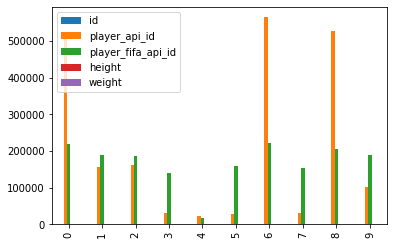

In [43]:
pdsql('''SELECT * FROM player LIMIT 100''')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
1,2,218353,505942,2015-11-19 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
2,3,218353,505942,2015-09-21 00:00:00,62,66,right,medium,medium,49,...,54,48,65,66,69,6,11,10,8,8
3,4,218353,505942,2015-03-20 00:00:00,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7
4,5,218353,505942,2007-02-22 00:00:00,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7
5,6,189615,155782,2016-04-21 00:00:00,74,76,left,high,medium,80,...,66,59,76,75,78,14,7,9,9,12
6,7,189615,155782,2016-04-07 00:00:00,74,76,left,high,medium,80,...,66,59,76,75,78,14,7,9,9,12
7,8,189615,155782,2016-01-07 00:00:00,73,75,left,high,medium,79,...,65,59,76,75,78,14,7,9,9,12
8,9,189615,155782,2015-12-24 00:00:00,73,75,left,high,medium,79,...,65,59,76,75,78,14,7,9,9,12
9,10,189615,155782,2015-12-17 00:00:00,73,75,left,high,medium,79,...,65,59,76,75,78,14,7,9,9,12


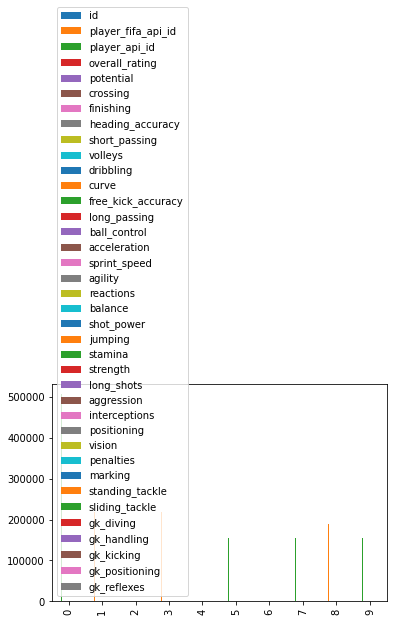

In [44]:
pdsql('''SELECT * FROM player_attributes LIMIT 10''')

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


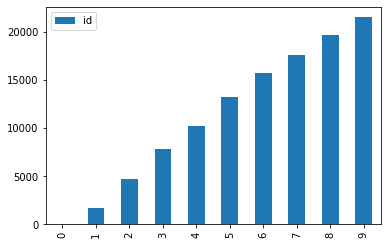

In [45]:
pdsql('''SELECT * FROM country LIMIT 10''')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
95,15618,9790,28.0,Hamburger SV,HAM
96,15619,8178,32.0,Bayer 04 Leverkusen,LEV
97,15620,9789,22.0,Borussia Dortmund,DOR
98,15621,10189,34.0,FC Schalke 04,S04


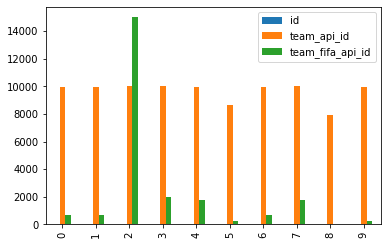

In [46]:
pdsql('''SELECT * FROM Team LIMIT 100''')

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,...,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


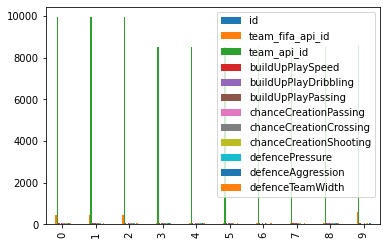

In [47]:
pdsql('''SELECT * FROM Team_attributes LIMIT 10''')